# <center> Data Visualization - Level 1 - Part 2
Source: https://www.kaggle.com/learn/data-visualisation
### Plotting with Seaborn
Source: https://www.kaggle.com/residentmario/plotting-with-seaborn

In [1]:
#Plot inline
%matplotlib inline

In [2]:
import pandas as pd
reviews = pd.read_csv('https://www.dropbox.com/s/v7ygrphzbbsndko/winemag-data_first150k.csv?dl=1', index_col=0)
import seaborn as sns

### Countplot

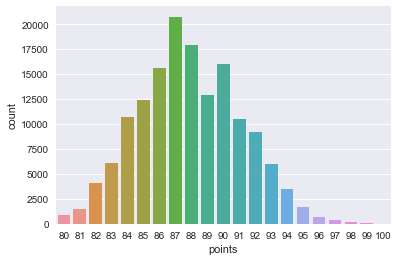

In [3]:
%matplotlib inline
sns.countplot(reviews['points'])

### KDE Plot

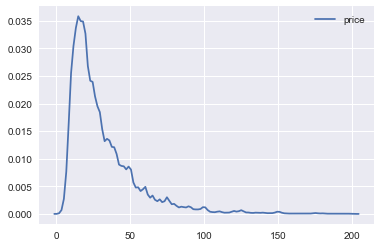

In [4]:
sns.kdeplot(reviews.query('price < 200').price)

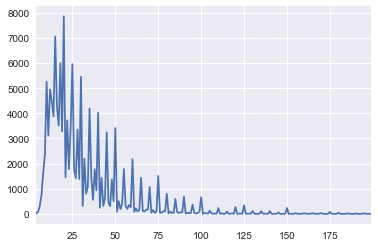

In [5]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

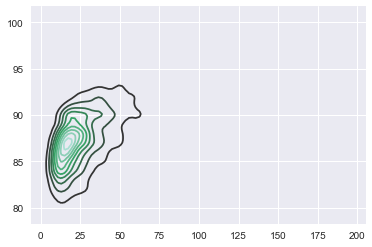

In [6]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:,['price','points']].dropna().sample(5000))

### Distplot

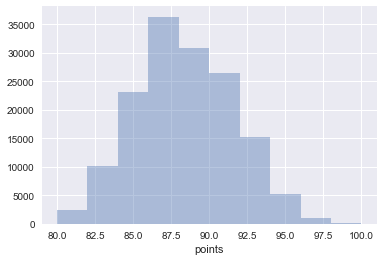

In [7]:
sns.distplot(reviews['points'], bins=10, kde=False)

### Scatterplot and hexplot

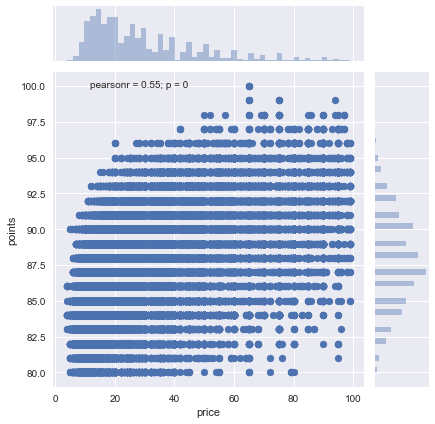

In [8]:
sns.jointplot(x='price',y='points', 
              data=reviews[reviews['price']<100])

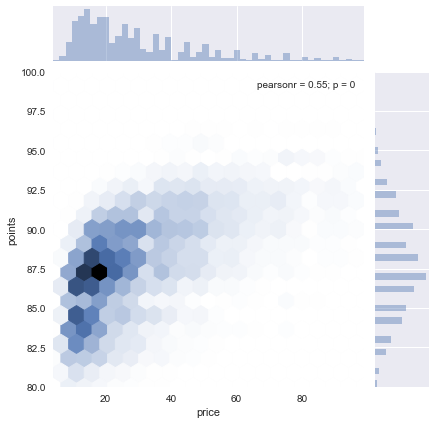

In [9]:
sns.jointplot(x='price',y='points', 
              data=reviews[reviews['price']<100],
             kind='hex', gridsize=20)

### Boxplot and Violin Plot

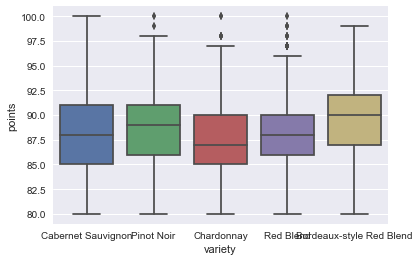

In [10]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(x='variety',y='points', data=df)

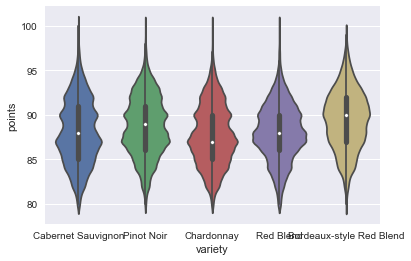

In [11]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

### Example

In [12]:
pokemon = pd.read_csv('https://www.dropbox.com/s/m44o5lbwfurdhxg/Pokemon.csv?dl=1', index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


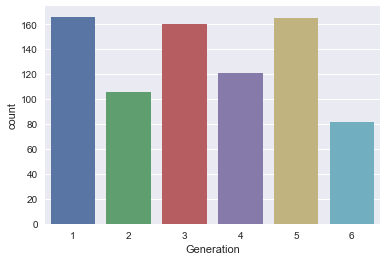

In [13]:
sns.countplot(data = pokemon, x='Generation')

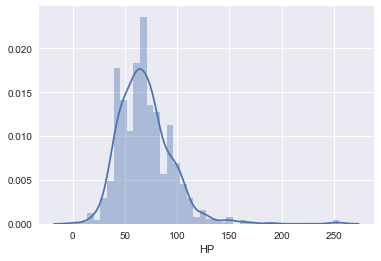

In [14]:
sns.distplot(pokemon.HP)

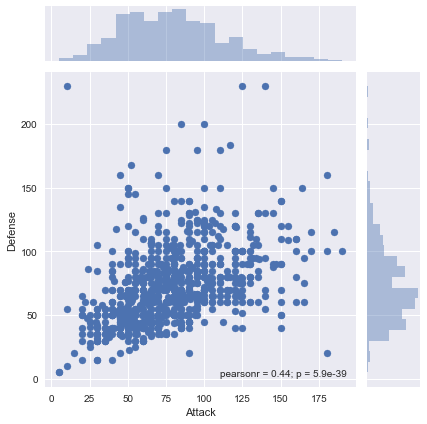

In [15]:
sns.jointplot(y='Defense', x='Attack', data=pokemon)

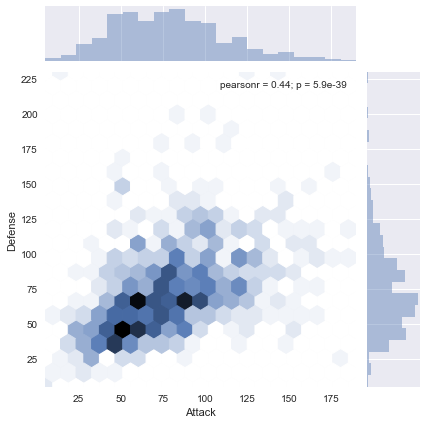

In [16]:
sns.jointplot(y='Defense', x='Attack', data=pokemon,
             kind='hex', gridsize=20)

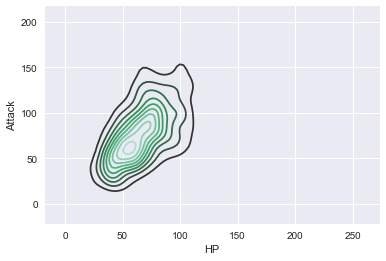

In [17]:
sns.kdeplot(pokemon.HP, pokemon.Attack)

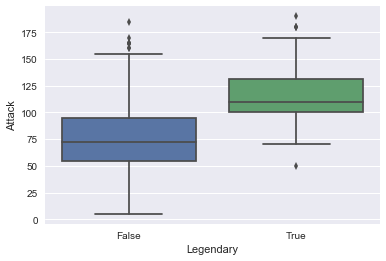

In [18]:
sns.boxplot(y='Attack', x='Legendary', data=pokemon)

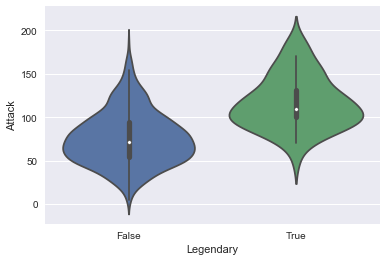

In [19]:
sns.violinplot(y='Attack', x='Legendary', data=pokemon)

# <center> Faceting with seaborn
Source: https://www.kaggle.com/residentmario/faceting-with-seaborn

In [20]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("Data/Visualizations/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/Users/Kavi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [22]:
import seaborn as sns

### The FacetGrid

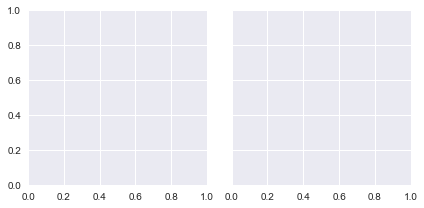

In [23]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
g = sns.FacetGrid(df, col='Position')

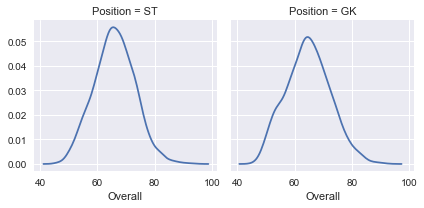

In [24]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot,'Overall')

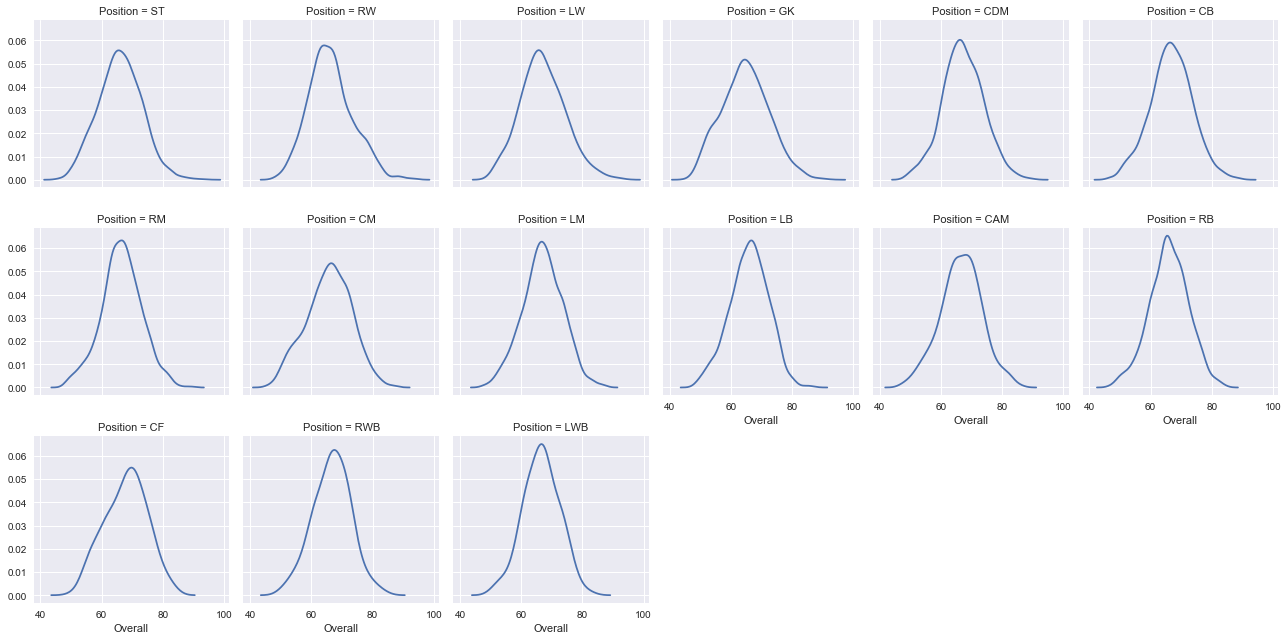

In [25]:
df = footballers

g = sns.FacetGrid(df, col='Position', col_wrap=6)
g.map(sns.kdeplot, 'Overall')

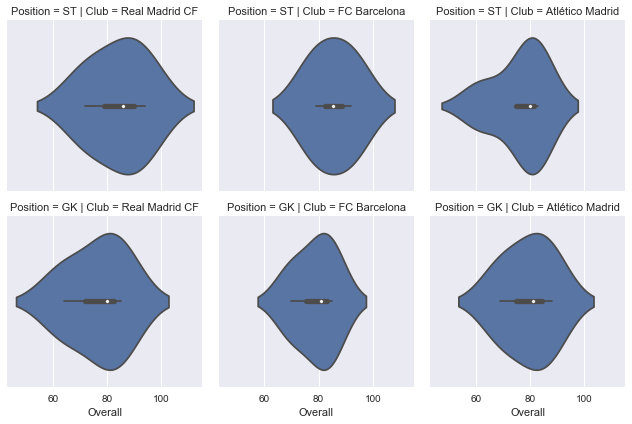

In [26]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df ,row='Position', col='Club')
g.map(sns.violinplot, 'Overall')

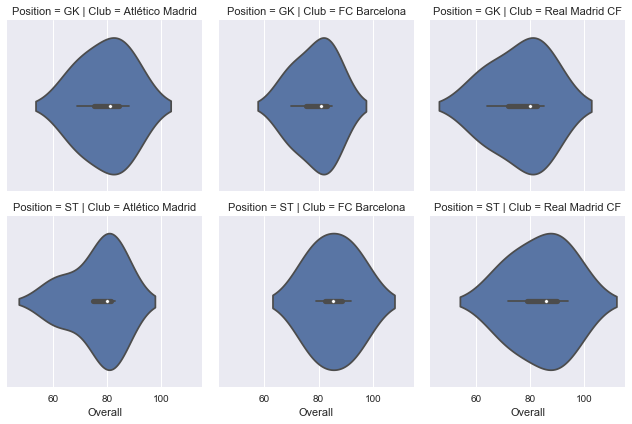

In [27]:
# Ordering Facet Grid
df = footballers[footballers['Position'].isin(['ST','GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df ,row='Position', col='Club',
                 row_order=['GK','ST'],
                 col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF']
                 )
g.map(sns.violinplot, 'Overall')

### Pairplot

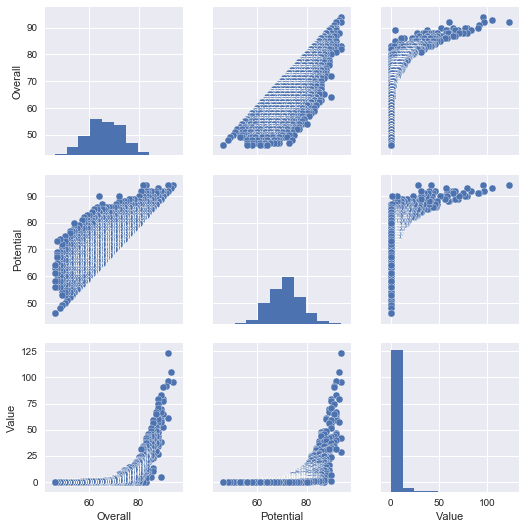

In [28]:
sns.pairplot(footballers[['Overall','Potential','Value']])

### Examples

In [29]:
import pandas as pd
import seaborn as sns

pokemon = pd.read_csv('https://www.dropbox.com/s/m44o5lbwfurdhxg/Pokemon.csv?dl=1', index_col=0)
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


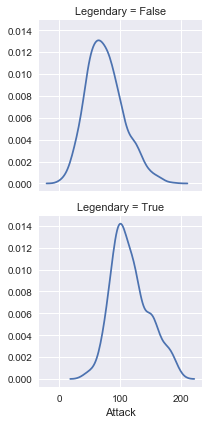

In [30]:
g = sns.FacetGrid(pokemon, row='Legendary')
g.map(sns.kdeplot,'Attack')

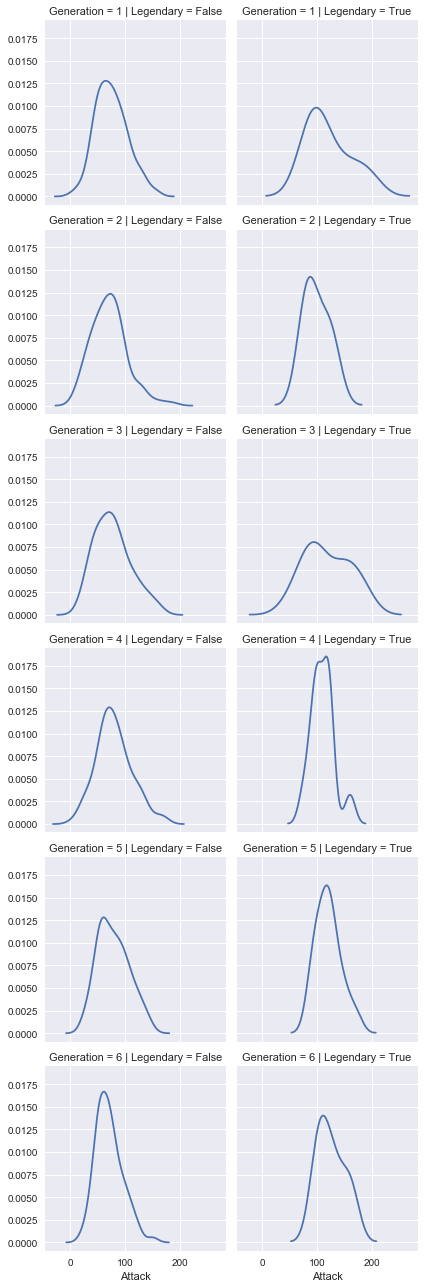

In [31]:
g = sns.FacetGrid(pokemon, col='Legendary', row='Generation')
g.map(sns.kdeplot,'Attack')

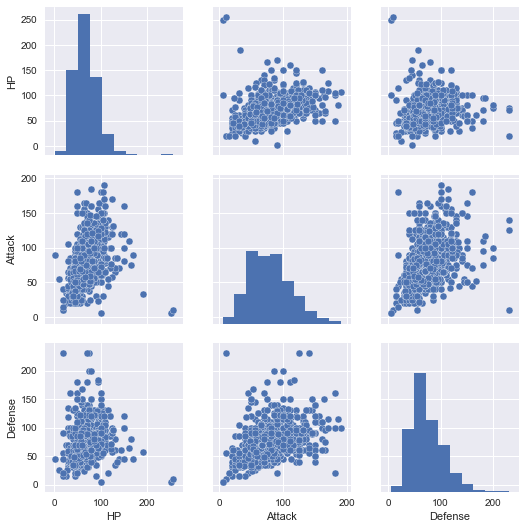

In [32]:
sns.pairplot(pokemon[['HP','Attack','Defense']])

# <center> Multivariate Plotting
Source: https://www.kaggle.com/residentmario/multivariate-plotting

In [33]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("Data/Visualizations/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/Users/Kavi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


### Multivariate Scatter Plots

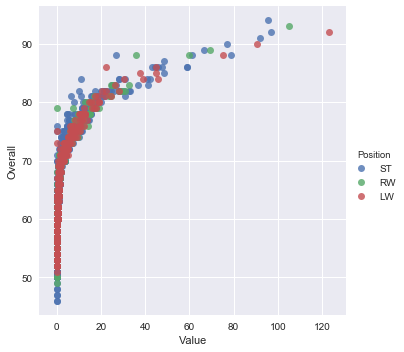

In [35]:
import seaborn as sns

sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

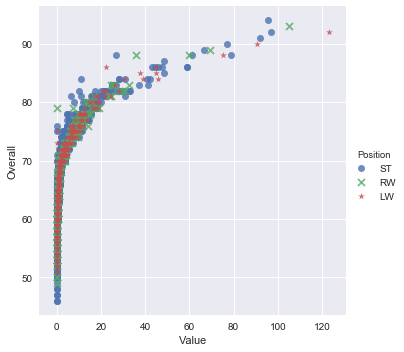

In [36]:
sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False, markers=['o','x','*'])

### Grouped Box Plot

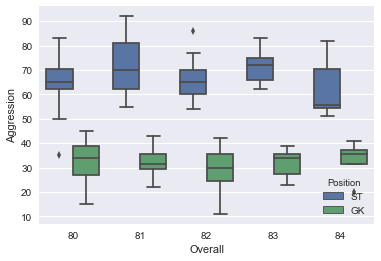

In [37]:
f = (footballers.loc[footballers['Position'].isin(['ST','GK'])]
    .loc[:,['Value','Overall','Aggression','Position']])

f = f[f['Overall'] >= 80]
f = f[f['Overall'] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x='Overall',y='Aggression',hue='Position',data=f)

### Summarization: Heatmap

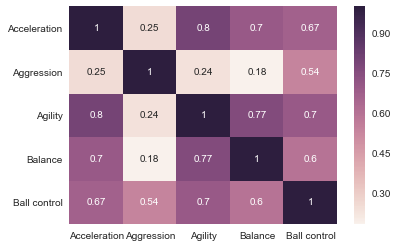

In [38]:
f = (footballers.loc[:,['Acceleration','Aggression',
                       'Agility','Balance','Ball control']]
    .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
    .dropna()
    ).corr()

sns.heatmap(f , annot=True)

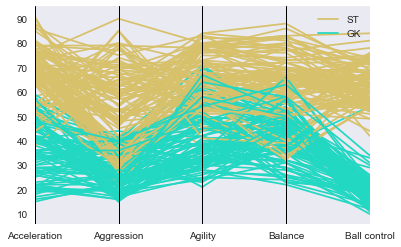

In [39]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

### Exercise

In [40]:
import pandas as pd
pokemon = pd.read_csv('https://www.dropbox.com/s/m44o5lbwfurdhxg/Pokemon.csv?dl=1')
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


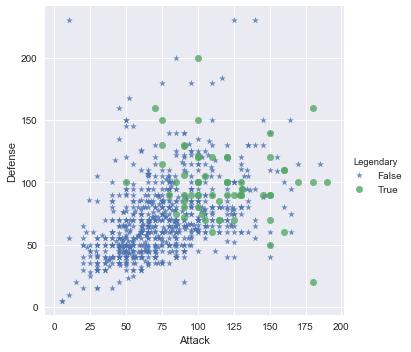

In [41]:
sns.lmplot(data=pokemon, x='Attack', y='Defense', hue='Legendary',
          fit_reg=False, markers=['*','o'])

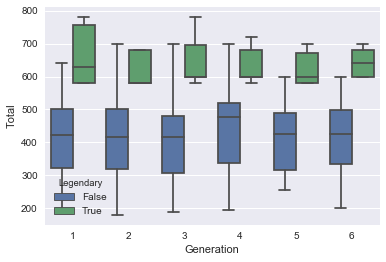

In [42]:
sns.boxplot(x='Generation',y='Total',hue='Legendary',data=pokemon)

# <center> Introducetiion to Plotly
Source: https://www.kaggle.com/residentmario/introduction-to-plotly-optional

In [43]:
import pandas as pd
reviews = pd.read_csv('Data/Visualizations/winemag-data-130k-v2.csv', index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


Plotly provides both online and offline modes. The latter injects the plotly source code directly into the notebook; the former does not. I recommend using plotly in offline mode the vast majority of the time, and it's the only mode that works on Kaggle (which disables network access in Python).

In [44]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [45]:
import plotly.graph_objs as go
iplot([go.Scatter(x=reviews.head(1000)['points'], 
                  y=reviews.head(1000)['price'], 
                  mode='markers')])

In [46]:
import plotly.graph_objs as go

In [47]:
iplot([go.Histogram2dContour(x=reviews.head(500)['points'], 
                             y=reviews.head(500)['price'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=reviews.head(1000)['points'], y=reviews.head(1000)['price'], mode='markers')])

Plotly exposes several different APIs, ranging in complexity from low-level to high-level. iplot is the highest-level API, and hence, the most convenient one for general-purpose use.

Personally I've always found the plotly Surface its most impressive feature (albeit one of the hardest to get right):

In [48]:
df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()

In [49]:
iplot([go.Surface(z=v)])

In [50]:
# choropleths
df = reviews['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

### Exercises

In [51]:
import pandas as pd
pokemon = pd.read_csv('https://www.dropbox.com/s/m44o5lbwfurdhxg/Pokemon.csv?dl=1')
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [52]:
import plotly.graph_objs as go
iplot([go.Scatter(x=pokemon.head(1000)['Attack'], 
                  y=pokemon.head(1000)['Defense'], 
                  mode='markers')])

# <center> Grammer of graphics with plotnine
Source: https://www.kaggle.com/residentmario/grammer-of-graphics-with-plotnine-optional

Python's implementation of R's ggplot2
### Introductions

In [53]:
import pandas as pd
reviews = pd.read_csv('Data/Visualizations/winemag-data-130k-v2.csv', index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [55]:
from plotnine import *

/Users/Kavi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [56]:
top_wines = reviews[reviews['variety'].isin(reviews['variety']
                                            .value_counts()
                                            .head(5)
                                            .index)]

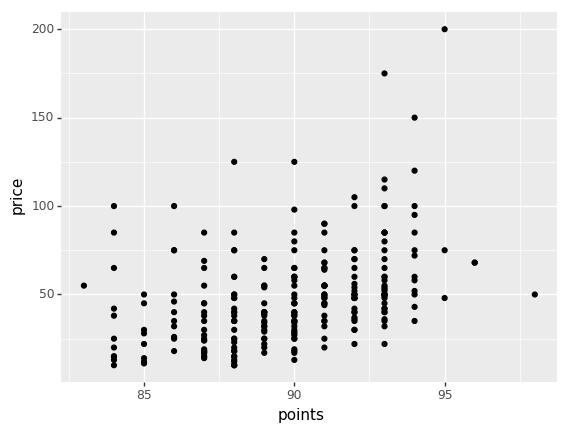

<ggplot: (-9223372036530384787)>

In [58]:
df = top_wines.head(1000).dropna()

(ggplot(df)
  + aes('points','price')
  + geom_point())

* add regressionl line with stats_smooth

/Users/Kavi/anaconda/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



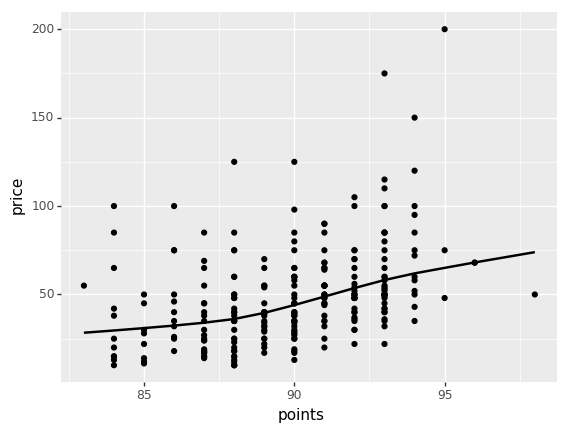

<ggplot: (-9223372036539983146)>

In [59]:
df = top_wines.head(1000).dropna()

(ggplot(df)
  + aes('points','price')
  + geom_point()
  + stat_smooth())

* add color with aes and color parameters

/Users/Kavi/anaconda/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



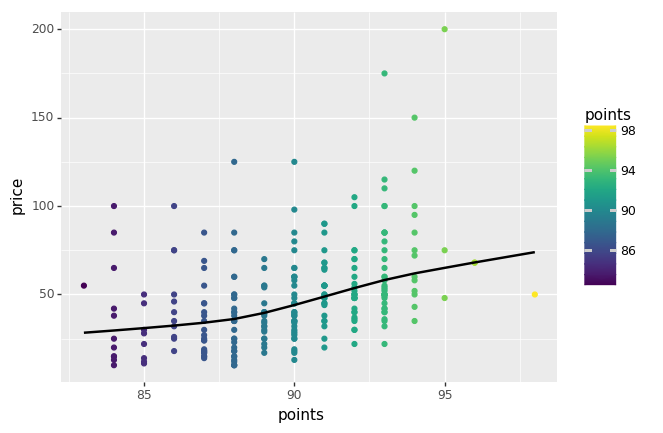

<ggplot: (-9223372036539946296)>

In [60]:
df = top_wines.head(1000).dropna()

(ggplot(df)
  + aes(color='points')
  + aes('points','price')
  + geom_point()
  + stat_smooth())

* to apply faceting, use facet_wrap

/Users/Kavi/anaconda/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



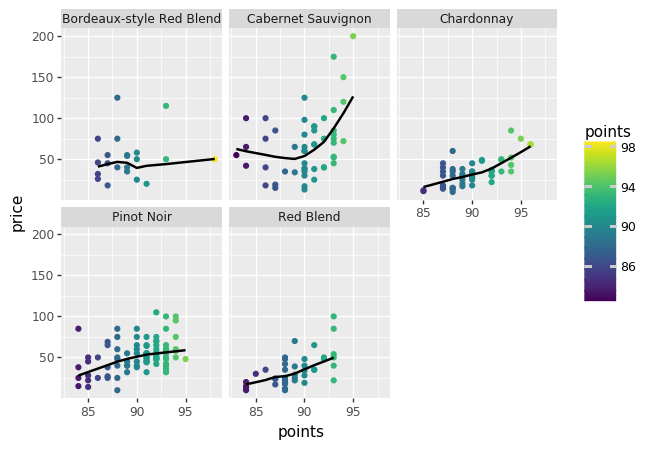

<ggplot: (314828783)>

In [61]:
df = top_wines.head(1000).dropna()

(ggplot(df)
  + aes(color='points')
  + aes('points','price')
  + geom_point()
  + stat_smooth()
  + facet_wrap('variety'))

* aes can also appear as a layer parameters

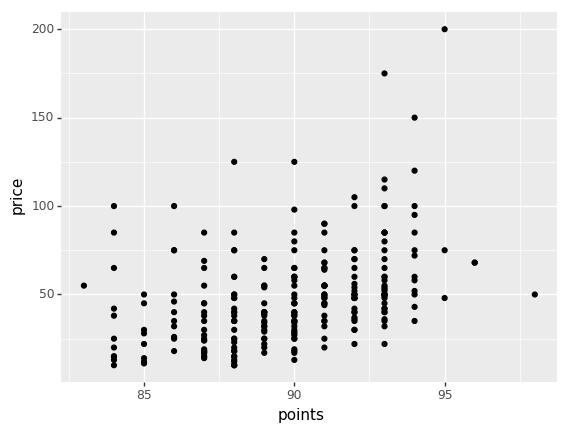

<ggplot: (-9223372036529613757)>

In [65]:
(ggplot(df)
  + geom_point(aes('points','price'))
)

* or you can use aes a  parameter in the data

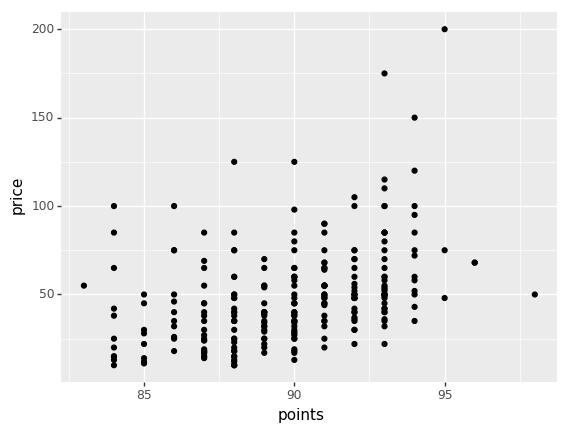

<ggplot: (-9223372036529794118)>

In [66]:
(ggplot(df, aes('points','price'))
  + geom_point()
)

### More plotnine

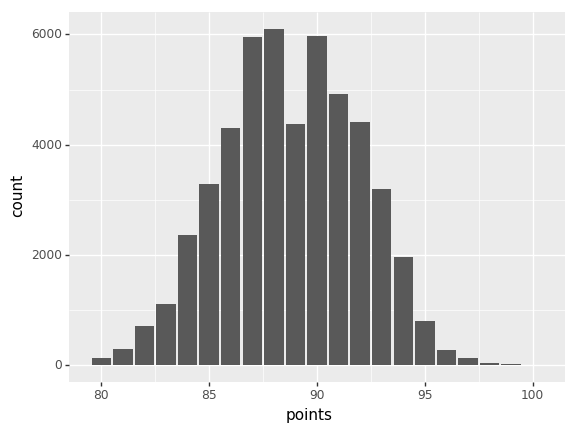

<ggplot: (-9223372036539983216)>

In [68]:
(ggplot(top_wines)
  + aes('points')
  + geom_bar()
)

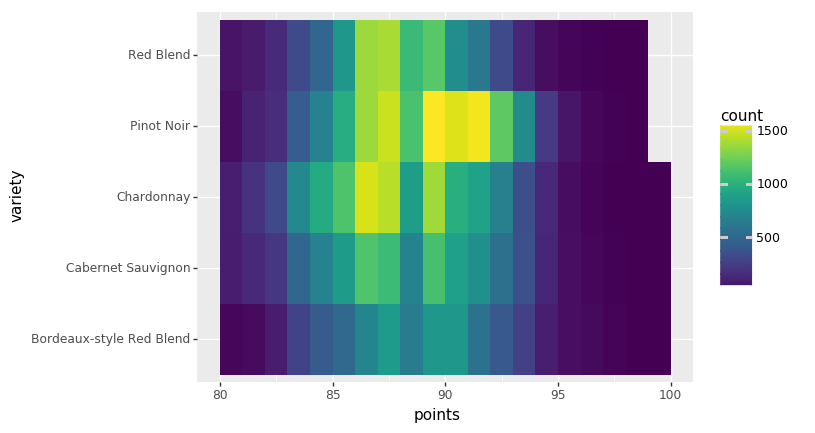

<ggplot: (-9223372036529918716)>

In [69]:
(ggplot(top_wines)
  + aes('points','variety')
  + geom_bin2d(bins=20))

* coord_fixed ad ggtitle are additional functions that can be called

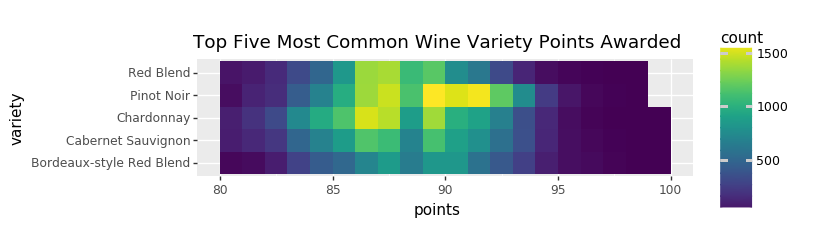

<ggplot: (-9223372036548099433)>

In [71]:
(ggplot(top_wines)
  + aes('points','variety')
  + geom_bin2d(bins=20)
  + coord_fixed(ratio=1)
  + ggtitle('Top Five Most Common Wine Variety Points Awarded')
)

### Exercise

In [72]:
import pandas as pd
pokemon = pd.read_csv('https://www.dropbox.com/s/m44o5lbwfurdhxg/Pokemon.csv?dl=1')

pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


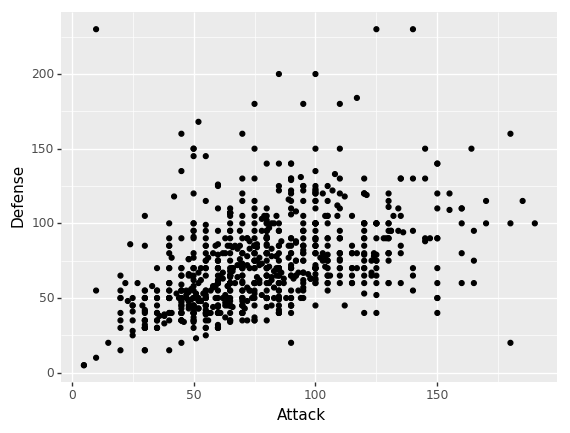

<ggplot: (-9223372036548125503)>

In [74]:
(ggplot(pokemon)
  + aes('Attack','Defense')
  + geom_point()
)

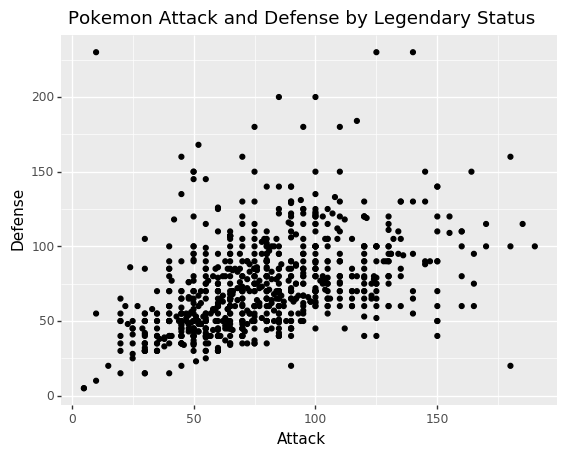

<ggplot: (306575175)>

In [76]:
# Plot with hue and ggtitle
(ggplot(pokemon)
  + aes('Attack','Defense')
  + geom_point()
  + ggtitle('Pokemon Attack and Defense by Legendary Status')
)

Author: Kavi Sekhon